<a href="https://colab.research.google.com/github/syamkakarla98/DataScience_Head_Start/blob/master/Student_Preformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance in Exams

[Student Performance in exams at public schools](http://roycekimmons.com/tools/generated_data/exams)

## Importing Libraries

In [1]:
 #!/usr/bin/env python -W ignore::DeprecationWarning

# Data Handling 
import pandas as pd
import numpy as np
from itertools import combinations

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import HTML
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style('whitegrid')

# Chand=ging directory
%cd '/content/drive/My Drive/DataScience/Data_Science_Head_Start'

/content/drive/My Drive/DataScience/Data_Science_Head_Start


## Reading Data

In [0]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Viewing data

In [6]:
df.reset_index()
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
(df.head(20)
 .style
 .hide_index()
 .bar(color='#70A1D7', vmin=0, subset=['math score'])
 .bar(color='#FF6F61', vmin=0, subset=['reading score'])
 .bar(color='mediumspringgreen', vmin=0, subset=['writing score'])
 .set_caption(''))

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78
female,group B,some college,standard,completed,88,95,92
male,group B,some college,free/reduced,none,40,43,39
male,group D,high school,free/reduced,completed,64,64,67
female,group B,high school,free/reduced,none,38,60,50


### Analysis of categorical attributes

### A Bar Plot & Count Plot w.r.t **Gender**, **Race/ethnicity**, **Parental Level of Education**, **Lunch** and **Test Preparation Course**.

<Figure size 864x432 with 0 Axes>

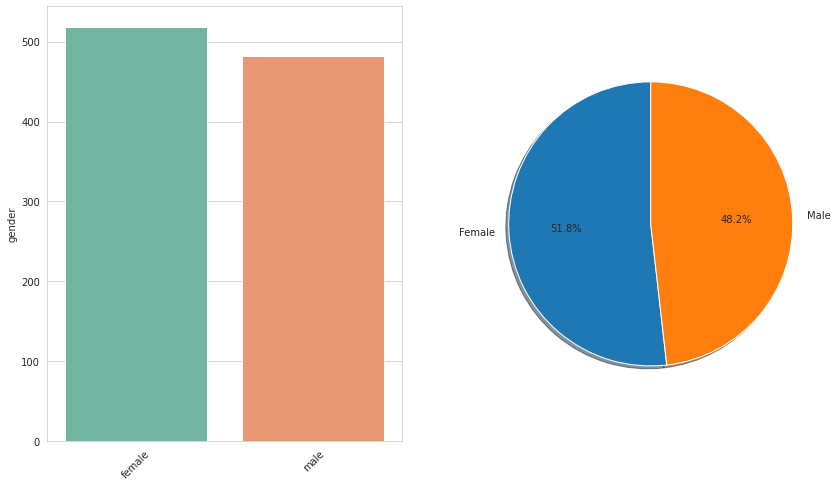

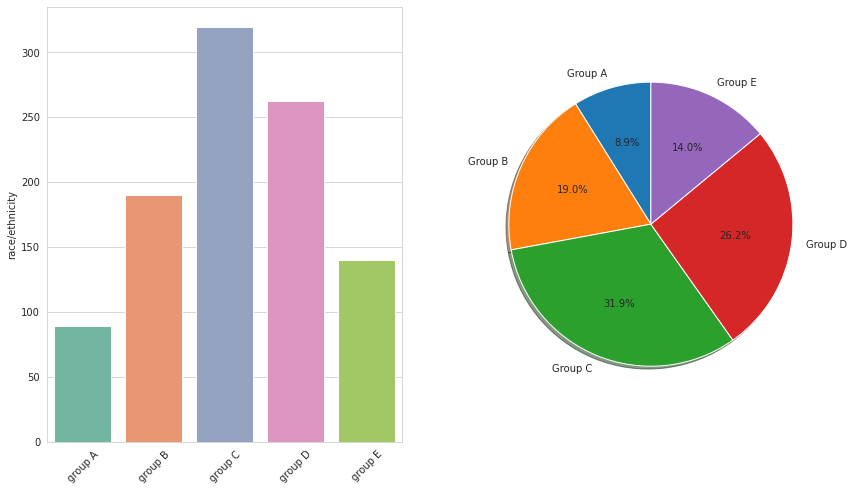

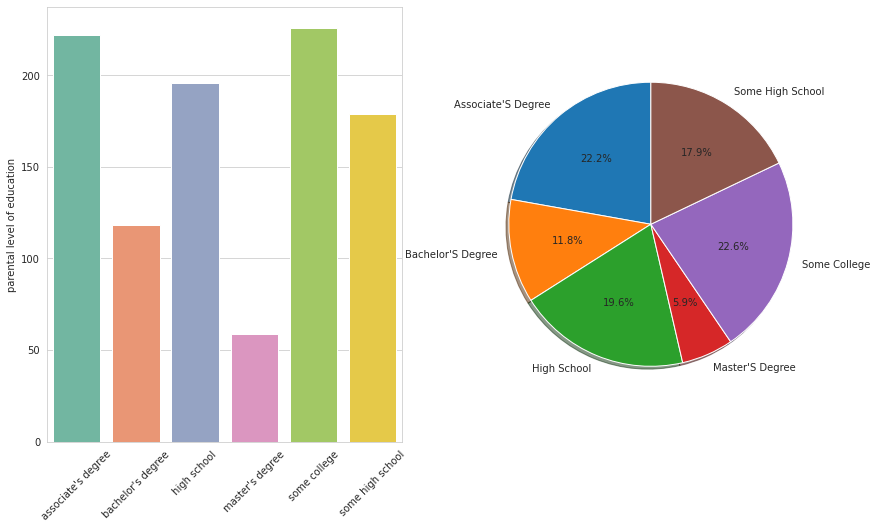

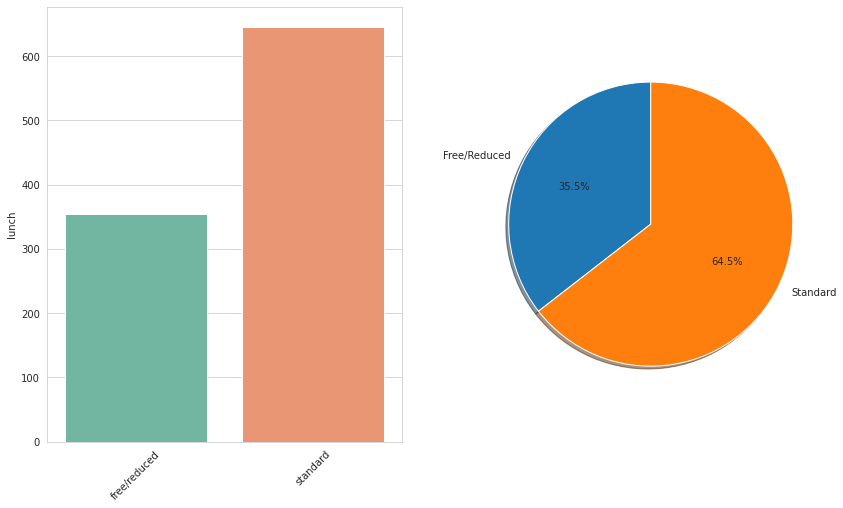

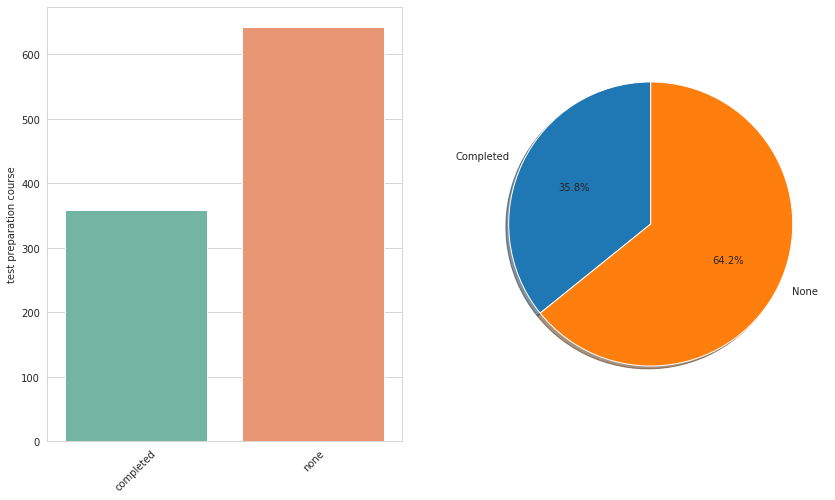

In [8]:
plt.figure(figsize=(12, 6))
for attribute in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
  f, ax = plt.subplots(1,2)
  data = df[attribute].value_counts().sort_index()
  bar = sns.barplot(x = data.index, y = data, ax = ax[0], palette="Set2",)
  for item in bar.get_xticklabels():
    item.set_rotation(45)
  ax[1].pie(data.values.tolist() , labels= [i.title() for i in data.index.tolist()], autopct='%1.1f%%',shadow=True, startangle=90);
  plt.show()

### Distribution Plots of Numeric Attributes **Math Score**, **Reading Score** and **wrtiting Score**

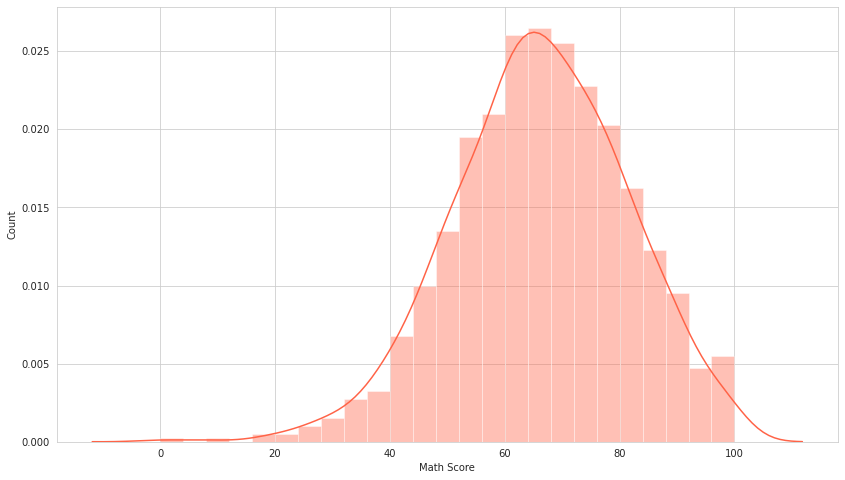

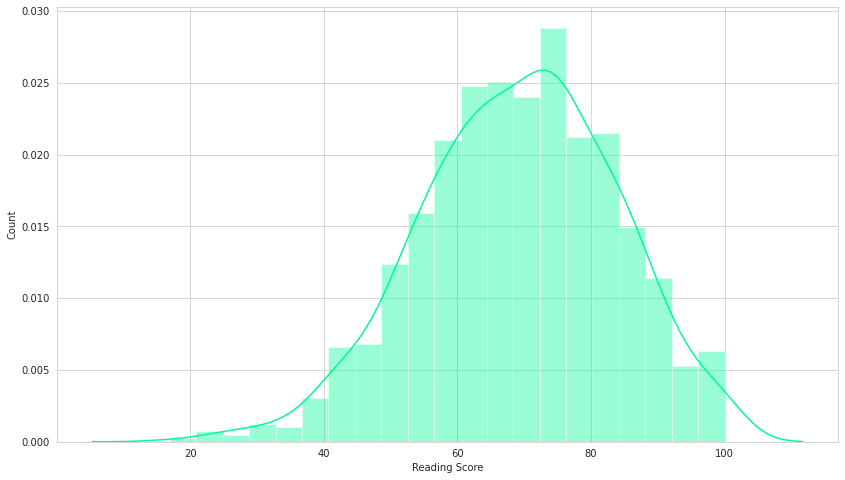

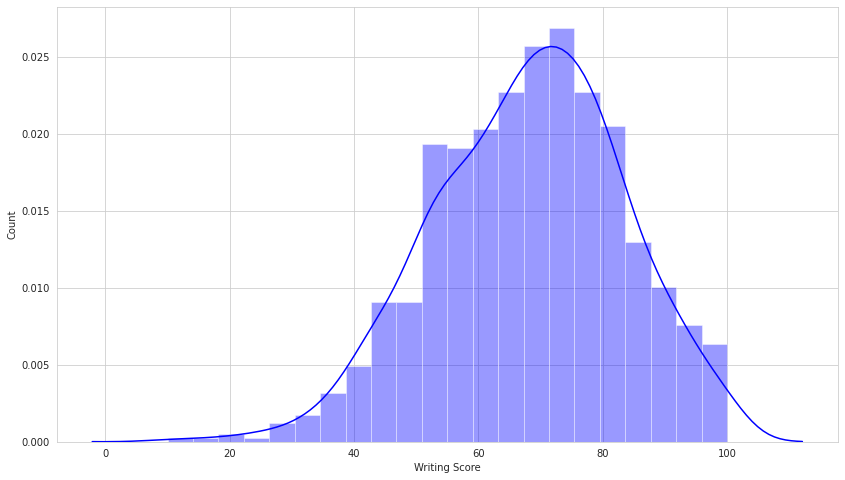

In [9]:

for lab, col in zip(['math score', 'reading score', 'writing score'], ['tomato', 'mediumspringgreen', 'blue']):
  sns.distplot(df[lab], label=lab.title(), color = col, ).set(xlabel=lab.title(), ylabel='Count')
  plt.show()


### Relationship Between Numerical Attributes

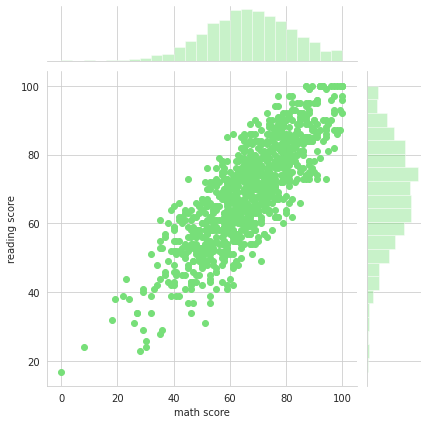

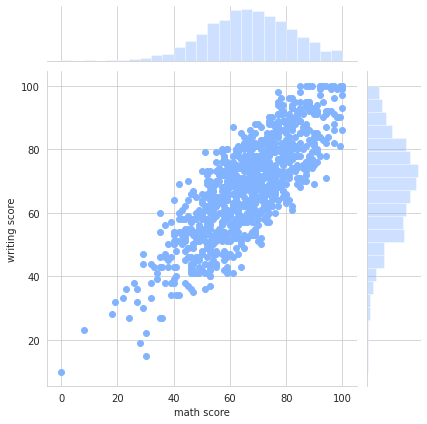

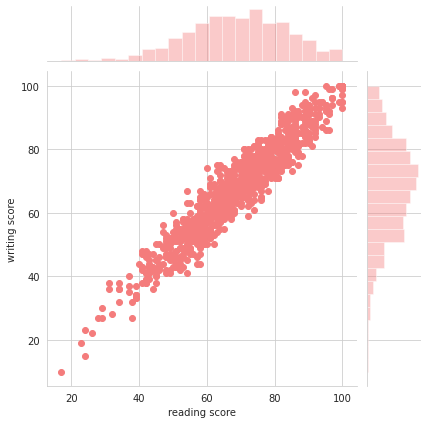

In [10]:

for attr, col in zip(list(combinations(['math score', 'reading score', 'writing score'], 2)), ['#77DF79', '#82B3FF', '#F47C7C']):
  sns.jointplot(df[attr[0]], df[attr[1]], color = col)
  plt.show()